## EDA

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os

from mpl_toolkits.axes_grid1 import ImageGrid
from collections import defaultdict

In [11]:
def show(images: list, title: str, names: list = None):
    """Show images in a grid"""

    fig = plt.figure(figsize=(20., 20.))
    grid = ImageGrid(fig, 111, nrows_ncols=(5, 5), axes_pad=0.1)
    for ax, im in zip(grid, images):
        ax.imshow(im)
        ax.axis('off')
        if names:
            ax.set_title(names.pop(0), fontsize=20)
    plt.suptitle(title, fontsize=20)
    plt.show()


def get_counts(directory: str):
    """Get image count per class in a directory"""
    
    counts = defaultdict(int)
    for label in os.listdir(directory):
        counts[label[:20]]= len(os.listdir(os.path.join(directory, label)))
    return dict(counts)

In [12]:
# Load data
data_dir = "./data/"

# Get class counts
train_counts = get_counts(os.path.join(data_dir, "train"))
test_counts = get_counts(os.path.join(data_dir, "test"))

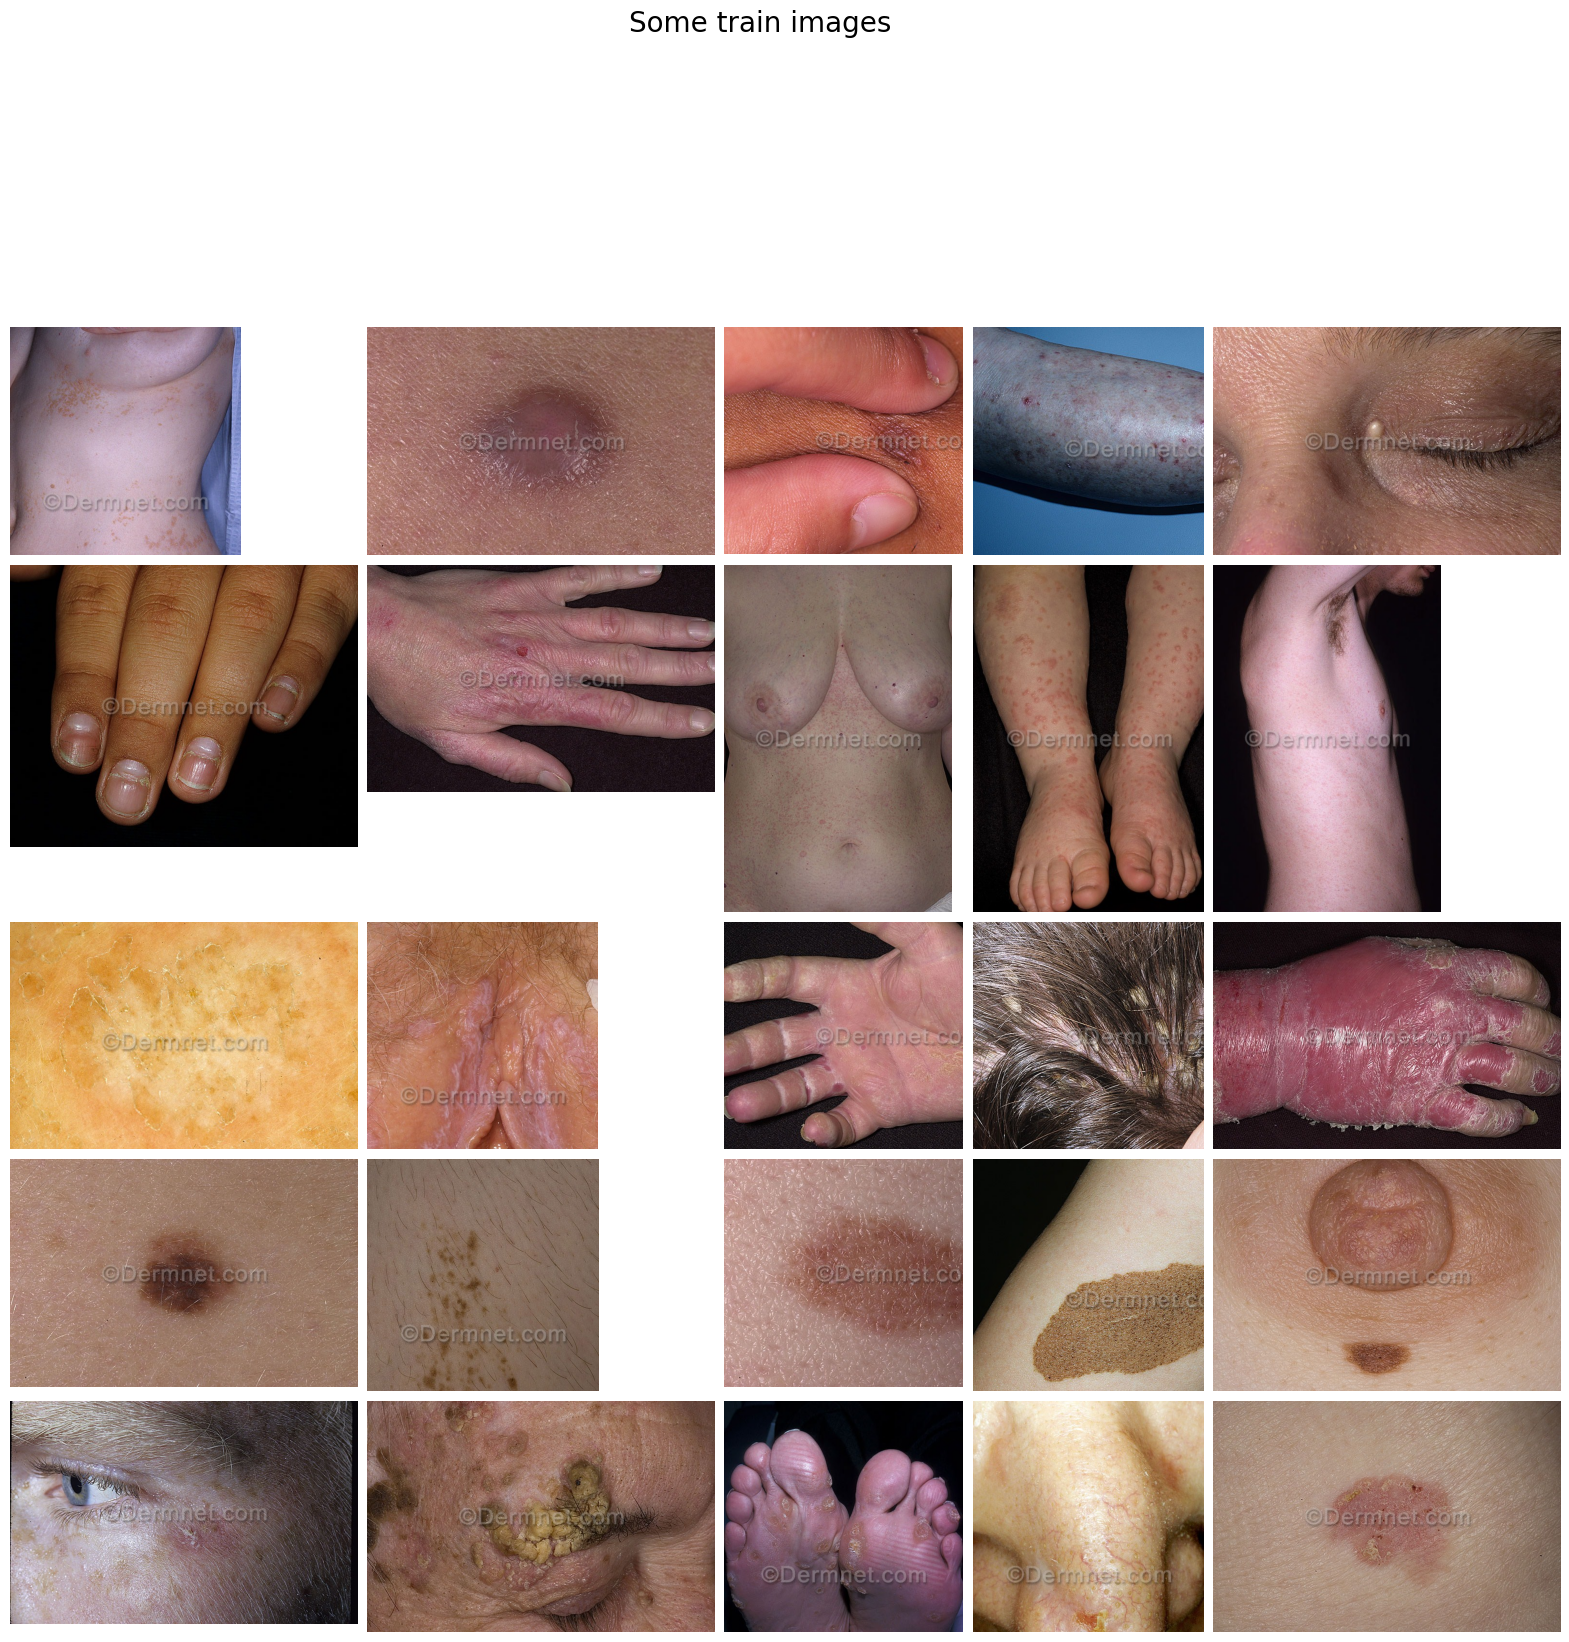

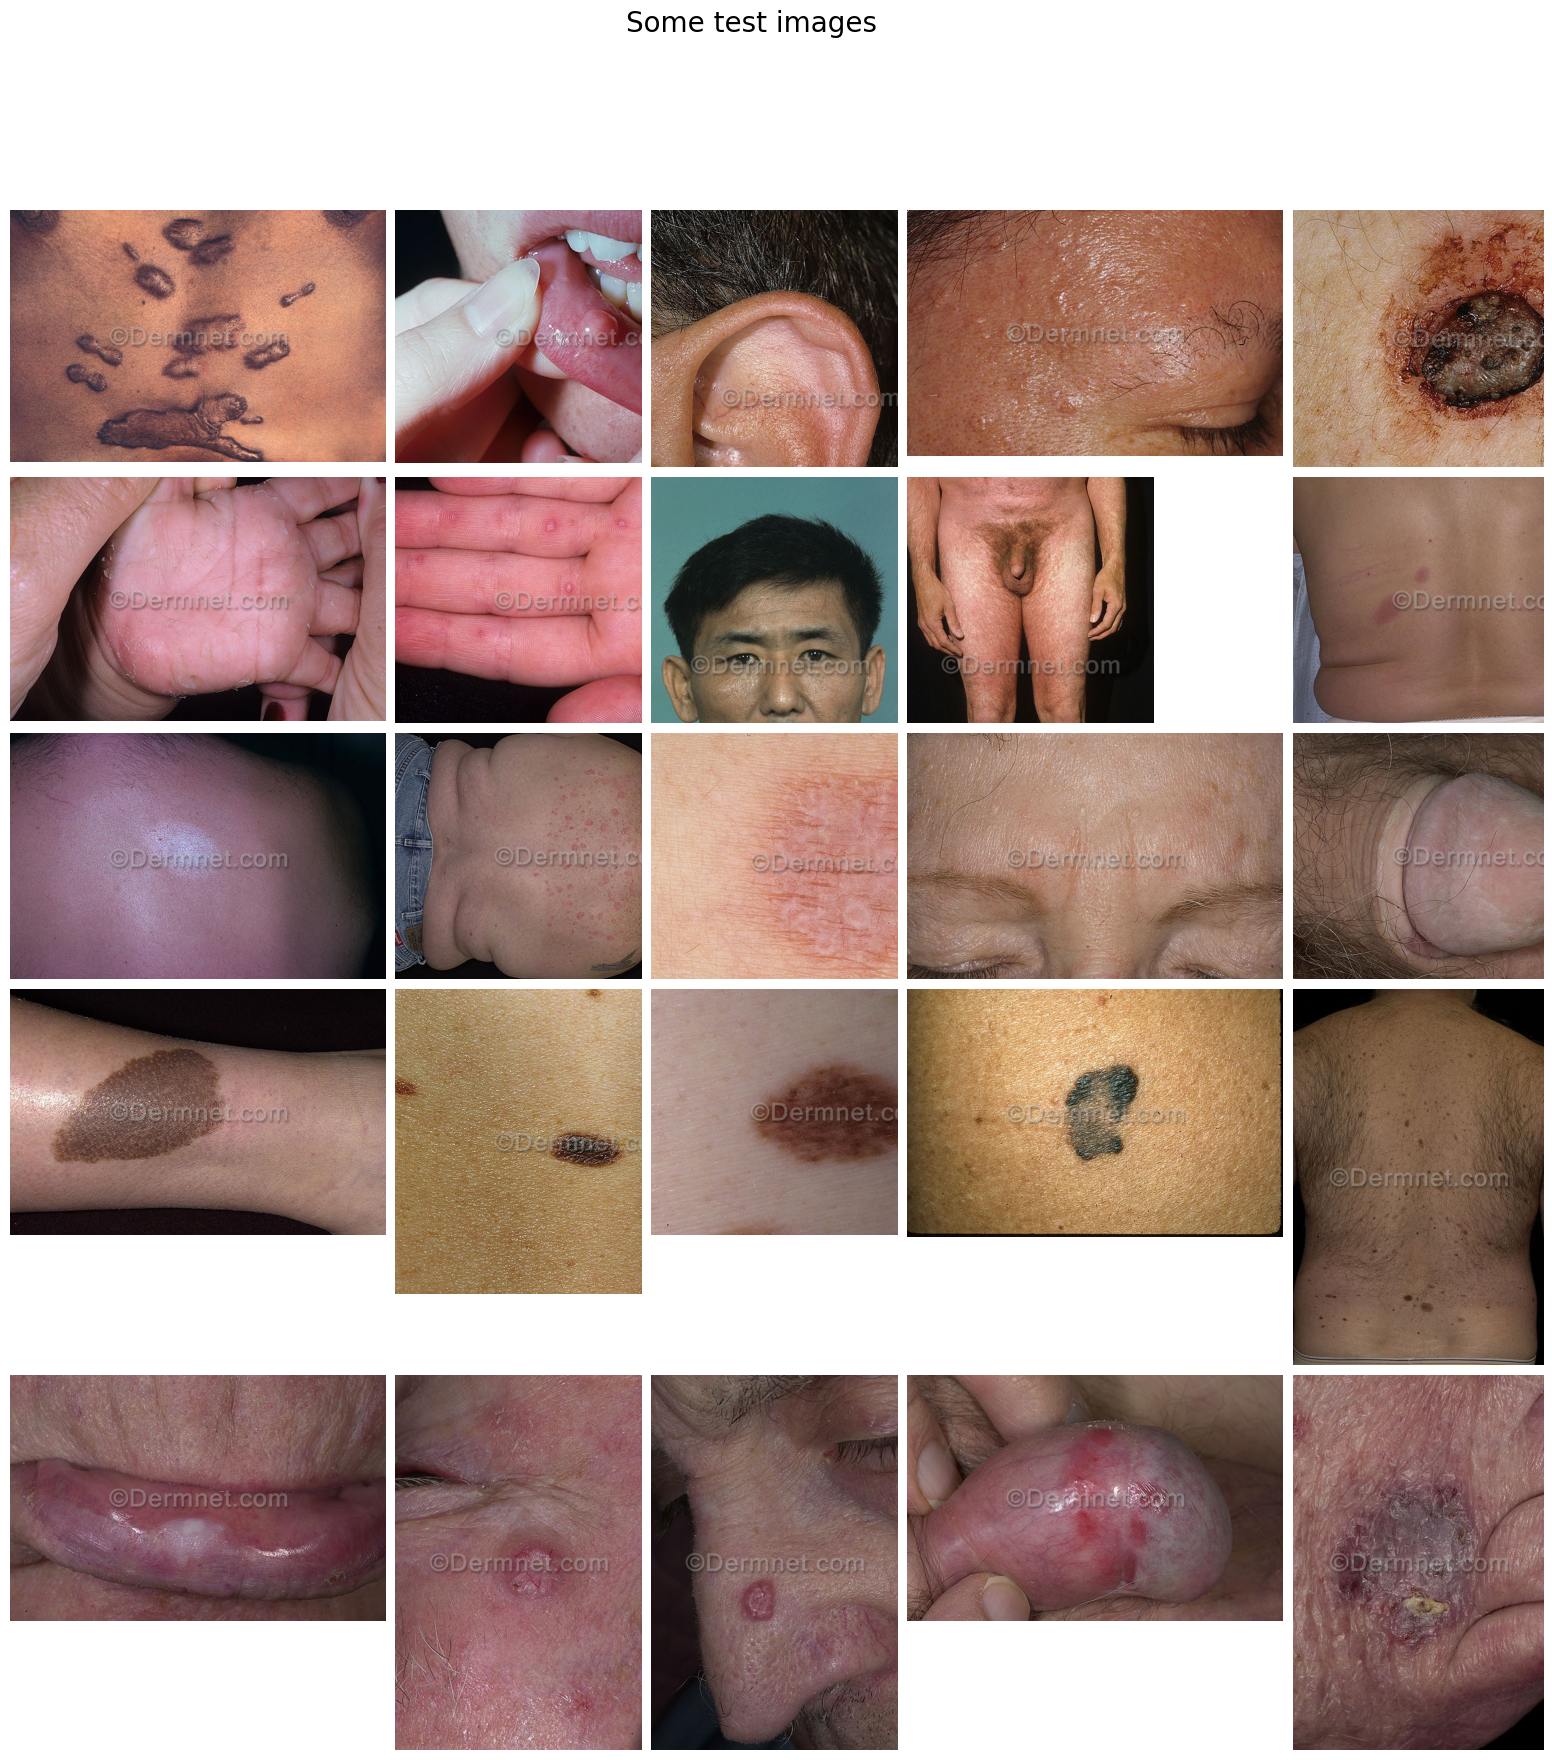

In [14]:
for datatype in ["train", "test"]:
    images = []
    for label in os.listdir(os.path.join(data_dir, datatype))[:5]:  # 5 classes
        for image_name in os.listdir(os.path.join(data_dir, datatype, label))[:5]:  # 5 images per class
            image_path = os.path.join(data_dir, datatype, label, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
    show(images, f"Some {datatype} images")

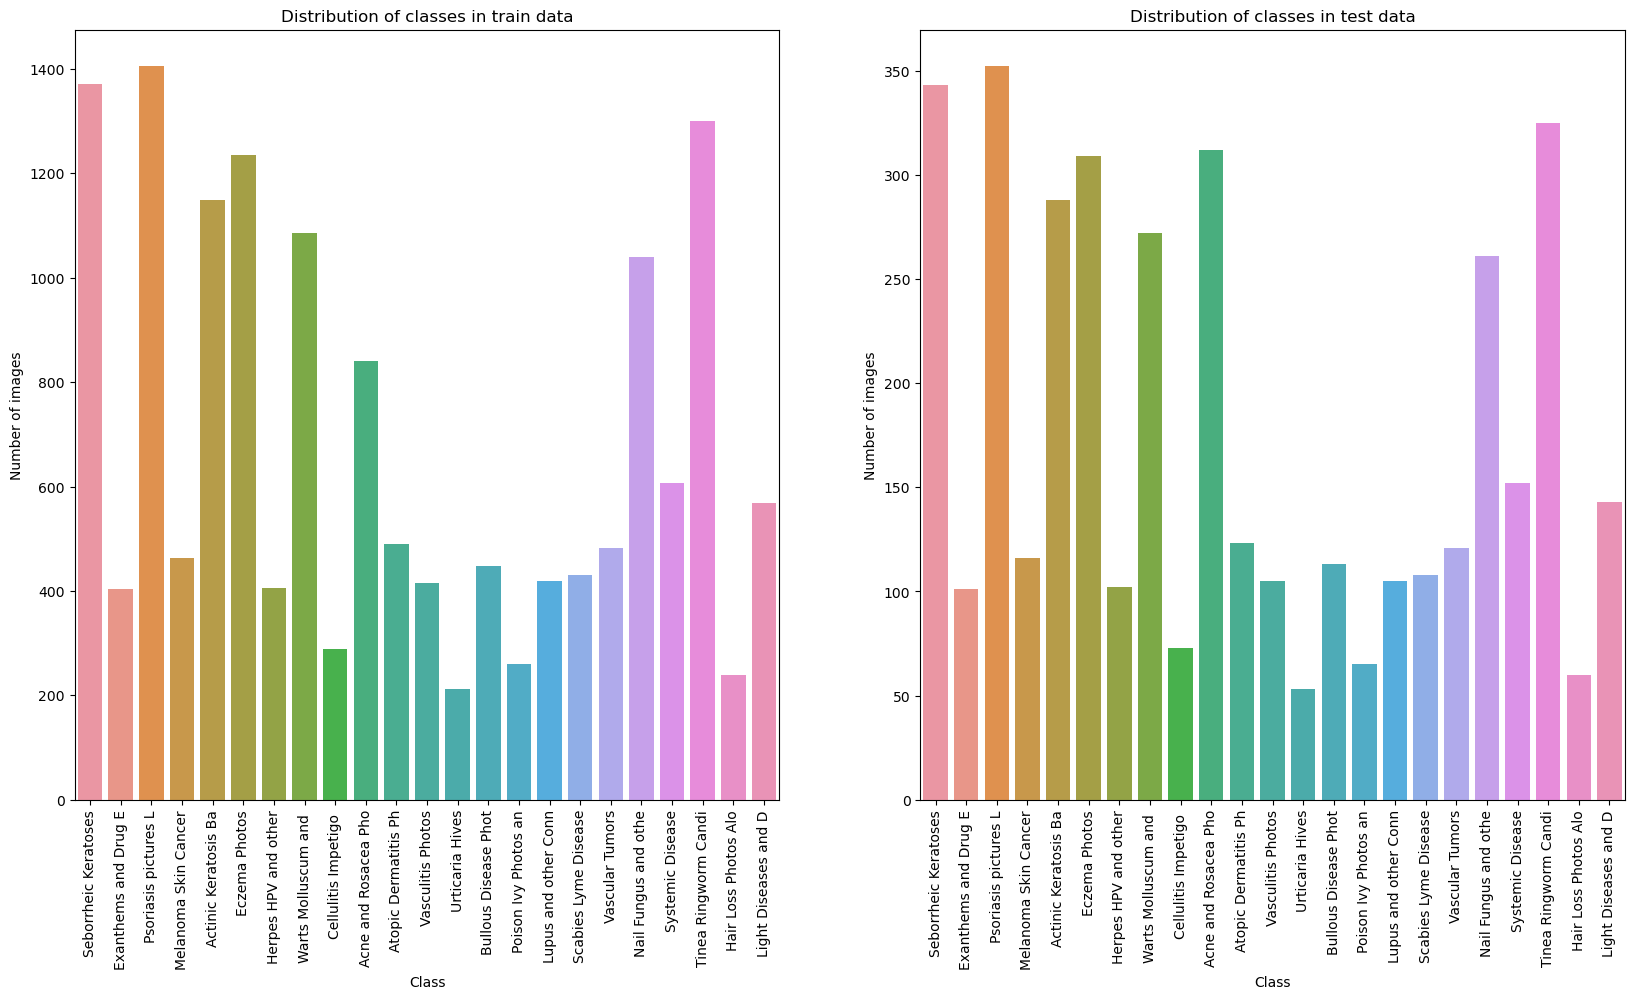

In [16]:
# Display class distribution in train and test data
train_df = pd.DataFrame(list(train_counts.items()), columns=["Class", "Number of images"])
test_df = pd.DataFrame(list(test_counts.items()), columns=["Class", "Number of images"])

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(data=train_df, x="Class", y="Number of images", ax=ax[0])
ax[0].set_title("Distribution of classes in train data")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
sns.barplot(data=test_df, x="Class", y="Number of images", ax=ax[1])
ax[1].set_title("Distribution of classes in test data")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()